In [11]:
import pandas as pd
import sqlite3
from os import path
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
#bdPath = path.join("..", "BD", "bd.db")
bdPath = path.join("bd.db")

In [12]:
bd = sqlite3.connect(bdPath) 

jogadores = pd.read_sql('SELECT summonerId, nick, jogador.elo, eloNum, pdl, vitorias, derrotas, winrate FROM jogador INNER JOIN elo ON elo.elo = jogador.elo', bd)
jogadoresPartida = pd.read_sql('SELECT gameId, time, summonerId, campeaoNome, kdaPartida, danoPartida, wardsPartida, csPartida FROM jogador_partida', bd)
campeoesJogadores = pd.read_sql('SELECT campeaoId, campeaoNome, campeaoPref, summonerId, partidas, vitorias, derrotas, campeao_jogador.winrate, kda FROM campeao_jogador INNER JOIN campeao ON campeao.nome = campeao_jogador.campeaoNome', bd)
partidas = pd.read_sql('SELECT * FROM partida', bd)
campeoes = pd.read_sql('SELECT * FROM campeao', bd)
elos = pd.read_sql('SELECT * FROM elo', bd)

bd.close()

In [272]:
jogadores.head(10)

summonerId     nick         elo  eloNum  pdl  vitorias  derrotas  winrate
0      400150      Mxu   Diamond 4      17    0       151       135     53.0
1      400152   Jackie   Diamond 2      19   51       125        99     56.0
2      400158     Cico  Platinum 2      15   17       210       217     49.0
3      400163  Lopesxz   Diamond 4      17   72       200       182     52.0
4      400165    VoIpe   Diamond 4      17    0       111        85     57.0
5      400196   Arezit  Platinum 2      15   49       189       195     49.0
6      400199  Nil Ego  Platinum 1      16   12       181       191     49.0
7      400203  Detento  Platinum 2      15   74       242       236     51.0
8      400233   Kheltz   Diamond 4      17    0       384       387     50.0
9      400245    Milos   Diamond 3      18   74       147       124     54.0

In [14]:
jogadoresPartida.head(5)

gameId  time  summonerId campeaoNome  kdaPartida  danoPartida  \
0  1563559582     0     4797336      Ezreal        1.86        27705   
1  1563559582     0     1694609     Lee Sin        2.12        17575   
2  1563559582     0     2795780   Gangplank        1.00        25761   
3  1563559582     0     5262450      Irelia        1.20        18159   
4  1563559582     0     6731659       Braum        2.17         6728   

   wardsPartida  csPartida  
0            13        239  
1            29        170  
2             8        271  
3            14        257  
4            24         71

In [15]:
campeoesJogadores.head(5)

campeaoId campeaoNome  campeaoPref  summonerId  partidas  vitorias  \
0         81      Ezreal            1      400152         7         3   
1         79      Gragas            2      400152         3         2   
2        518       Neeko            3      400152         3         2   
3         39      Irelia            4      400152         3         1   
4        412      Thresh            5      400152         2         2   

   derrotas  winrate   kda  
0         4        0  1.81  
1         1      100  6.43  
2         1       67  2.07  
3         2       67  1.45  
4         0       33  4.53

In [16]:
partidas.head(5)

gameId  vitoria  firstBlood  firstTower  firstInhibitor  firstBaron  \
0  1543573986        1           1           1              -1           1   
1  1543611352        0           0           0               0           0   
2  1543624002        0           0           0               0          -1   
3  1543626176        0           1           0               0           1   
4  1543651094        0           1           0               0           0   

   firstDragon  firstRiftHerald  t2_baronKills  t1_baronKills    ...     \
0            1                1              1              0    ...      
1            0                0              0              1    ...      
2            0                0              0              0    ...      
3            0                1              1              0    ...      
4            0                0              0              3    ...      

   t2_riftHeraldKills  t1_riftHeraldKills  t2_towerKills  t1_towerKills  \
0                   1                   0              6              1   
1                   0                   1              1             10   
2                   0                   1              1              8   
3                   1                   0              2              9   
4                   0                   1              4             10   

   t2_inhibitorKills  t1_inhibitorKills  killsRed  killsBlue  goldRed  \
0                  0                  0        21         12    46575   
1                  0                  3        25         31    49301   
2                  0                  1        14         32    33345   
3                  0                  1        22         37    49688   
4                  0                  4        31         42    67279   

   goldBlue  
0     36360  
1     60375  
2     45680  
3     57545  
4     76653  

[5 rows x 22 columns]

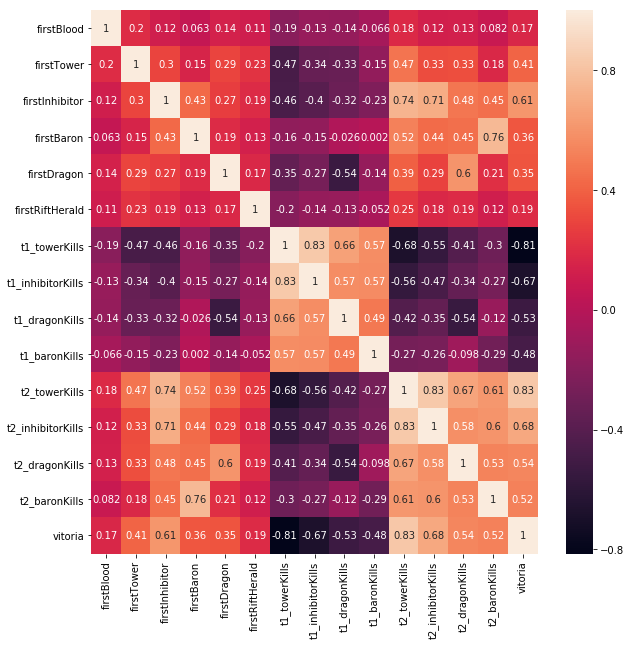

In [17]:
#Correlações dos dados de dentro da partida
fig = plt.figure(figsize=(10,10))
sns.heatmap(partidas[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_dragonKills', 't1_baronKills', 
                  't2_towerKills', 't2_inhibitorKills', 't2_dragonKills', 't2_baronKills', 'vitoria']].corr(), annot=True)

In [18]:
#Testando a partir de marcos (primeira torre, primeira morte e primeiros monstros)
x = partidas[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2783
           1       0.87      0.83      0.85      2752

   micro avg       0.86      0.86      0.86      5535
   macro avg       0.86      0.86      0.86      5535
weighted avg       0.86      0.86      0.86      5535



In [19]:
#Testando a partir de poucos marcos (primeira torre, primeira morte e primeiros monstros)
x = partidas[['firstTower']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2829
           1       0.70      0.69      0.70      2706

   micro avg       0.70      0.70      0.70      5535
   macro avg       0.70      0.70      0.70      5535
weighted avg       0.70      0.70      0.70      5535



In [20]:
#Testando a partir de objetivos destruidos (qtd de Torres e Inibidores)
x = partidas[['t1_towerKills', 't1_inhibitorKills', 't2_towerKills', 't2_inhibitorKills']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2843
           1       0.96      0.96      0.96      2692

   micro avg       0.96      0.96      0.96      5535
   macro avg       0.96      0.96      0.96      5535
weighted avg       0.96      0.96      0.96      5535



In [40]:
bd = sqlite3.connect(bdPath) 

jogadoresPartida2 = pd.read_sql('''
SELECT jogador_partida.gameid, 
    jogador_partida.time, 
    jogador_partida.summonerid, 
    jogador_partida.campeaonome, 
    campeao.campeaoid, 
    kdapartida, 
    danopartida, 
    wardspartida, 
    cspartida, 
    partida.vitoria 
FROM   jogador_partida 
INNER JOIN partida 
       ON jogador_partida.gameid = partida.gameid 
INNER JOIN campeao 
       ON campeao.nome = jogador_partida.campeaonome
ORDER BY jogador_partida.gameId
                                ''', bd)
bd.close()

In [41]:
jogadoresPartida2.head(10)

gameId  time  summonerId campeaoNome  campeaoId  kdaPartida  \
0  1543573986     1    11500133        Zyra        143        4.50   
1  1543573986     1     1623096    Xin Zhao          5        2.00   
2  1543573986     0      479504      Xerath        101        4.00   
3  1543573986     0      442011       Xayah        498        1.50   
4  1543573986     1    34350392       Talon         91        3.00   
5  1543573986     0     1402833        Nami        267        2.00   
6  1543573986     0     5655450     Lee Sin         64        0.78   
7  1543573986     0      521296      Irelia         39        0.75   
8  1543573986     1     8940999      Ezreal         81        2.50   
9  1543573986     1    23812390       Brand         63        9.00   

   danoPartida  wardsPartida  csPartida  vitoria  
0        13637            18         28        1  
1         8518             7        137        1  
2        15496             8        119        1  
3         4996             5        140        1  
4        15925             9        173        1  
5         4758            14          1        1  
6        10871             7         91        1  
7         5162             6        187        1  
8        10650             9        164        1  
9         8246             9        209        1

In [47]:
#Testando com base no desempenho individual do jogador naquela partida
x = jogadoresPartida2[['summonerId', 'time', 'campeaoId', 'kdaPartida', 'danoPartida', 'wardsPartida', 'csPartida']]
y = jogadoresPartida2['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.52      0.70      0.59     32726
           1       0.50      0.32      0.39     31094

   micro avg       0.51      0.51      0.51     63820
   macro avg       0.51      0.51      0.49     63820
weighted avg       0.51      0.51      0.49     63820



In [48]:
bd = sqlite3.connect(bdPath)
prePartida = pd.read_sql('''
SELECT jogador_partida.gameid, 
       jogador_partida.time, 
       partida.vitoria, 
       jogador_partida.summonerid, 
       jogador_partida.campeaonome, 
       campeao_jogador.campeaopref, 
       campeao_jogador.partidas, 
       campeao_jogador.vitorias, 
       campeao_jogador.derrotas, 
       campeao_jogador.winrate, 
       campeao_jogador.kda 
FROM   jogador_partida 
LEFT JOIN campeao_jogador 
       ON jogador_partida.summonerid = campeao_jogador.summonerid 
       AND jogador_partida.campeaonome = campeao_jogador.campeaonome 
INNER JOIN partida 
       ON jogador_partida.gameid = partida.gameid 
ORDER BY jogador_partida.gameId
                        ''', bd)
bd.close()

In [59]:
prePartida.fillna(0, inplace=True)
prePartida.head(10)

gameId  time  vitoria  summonerId campeaoNome  campeaoPref  partidas  \
0  1543573986     0        1     1402833        Nami          0.0       0.0   
1  1543573986     0        1      479504      Xerath          0.0       0.0   
2  1543573986     0        1      521296      Irelia          0.0       0.0   
3  1543573986     0        1      442011       Xayah          0.0       0.0   
4  1543573986     0        1     5655450     Lee Sin          1.0      39.0   
5  1543573986     1        1    34350392       Talon          1.0      84.0   
6  1543573986     1        1     1623096    Xin Zhao          0.0       0.0   
7  1543573986     1        1     8940999      Ezreal          3.0      41.0   
8  1543573986     1        1    23812390       Brand          0.0       0.0   
9  1543573986     1        1    11500133        Zyra          1.0      26.0   

   vitorias  derrotas  winrate   kda  
0       0.0       0.0      0.0  0.00  
1       0.0       0.0      0.0  0.00  
2       0.0       0.0      0.0  0.00  
3       0.0       0.0      0.0  0.00  
4      27.0      12.0     69.0  3.22  
5      64.0      20.0     76.0  3.48  
6       0.0       0.0      0.0  0.00  
7      20.0      21.0     49.0  2.31  
8       0.0       0.0      0.0  0.00  
9      18.0       8.0     69.0  3.34

In [68]:
#Testando apenas com dados pre-partida / historico com o campeao (Individual)
x = prePartida[['time', 'summonerId', 'campeaoPref', 'partidas', 'winrate', 'kda']]
y = prePartida['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67     32479
           1       0.00      0.00      0.00     31341

   micro avg       0.51      0.51      0.51     63820
   macro avg       0.25      0.50      0.34     63820
weighted avg       0.26      0.51      0.34     63820



In [78]:
bd = sqlite3.connect(bdPath)
prePartida2 = pd.read_sql('''
SELECT jogador_partida.gameid, 
       jogador_partida.time, 
       partida.vitoria, 
       jogador_partida.summonerid, 
       jogador_partida.campeaonome, 
       campeao.campeaoid, 
       campeao_jogador.campeaopref, 
       campeao_jogador.partidas, 
       campeao_jogador.vitorias, 
       campeao_jogador.derrotas, 
       campeao_jogador.winrate, 
       campeao_jogador.kda, 
       jogador.nick, 
       jogador.elo, 
       elo.elonum, 
       jogador.winrate AS winrateJog 
FROM   jogador_partida 
       LEFT JOIN partida 
               ON jogador_partida.gameid = partida.gameid 
       LEFT JOIN jogador 
               ON jogador.summonerid = jogador_partida.summonerid 
       LEFT JOIN elo 
               ON jogador.elo = elo.elo 
       LEFT JOIN campeao_jogador 
       ON jogador_partida.summonerid = campeao_jogador.summonerid 
          AND jogador_partida.campeaonome = campeao_jogador.campeaonome 
       LEFT JOIN campeao 
               ON campeao.nome = jogador_partida.campeaonome      
       ORDER BY jogador_partida.gameId
                        ''', bd)
bd.close()

prePartida2.fillna(0, inplace=True)
prePartida2.head(10)

gameId  time  vitoria  summonerId campeaoNome  campeaoId  campeaoPref  \
0  1543573986     0        1     1402833        Nami        267          0.0   
1  1543573986     0        1      479504      Xerath        101          0.0   
2  1543573986     0        1      521296      Irelia         39          0.0   
3  1543573986     0        1      442011       Xayah        498          0.0   
4  1543573986     0        1     5655450     Lee Sin         64          1.0   
5  1543573986     1        1    34350392       Talon         91          1.0   
6  1543573986     1        1     1623096    Xin Zhao          5          0.0   
7  1543573986     1        1     8940999      Ezreal         81          3.0   
8  1543573986     1        1    23812390       Brand         63          0.0   
9  1543573986     1        1    11500133        Zyra        143          1.0   

   partidas  vitorias  derrotas  winrate   kda             nick         elo  \
0       0.0       0.0       0.0      0.0  0.00          A Moska  Platinum 2   
1       0.0       0.0       0.0      0.0  0.00             Driw   Diamond 4   
2       0.0       0.0       0.0      0.0  0.00           Scalol   Diamond 4   
3       0.0       0.0       0.0      0.0  0.00             nitk   Diamond 4   
4      39.0      27.0      12.0     69.0  3.22  Brenin Uma Bola   Diamond 3   
5      84.0      64.0      20.0     76.0  3.48  Connor SniperxD   Diamond 4   
6       0.0       0.0       0.0      0.0  0.00    u make me sad   Diamond 4   
7      41.0      20.0      21.0     49.0  2.31          Klothus   Diamond 4   
8       0.0       0.0       0.0      0.0  0.00        vini02378   Diamond 2   
9      26.0      18.0       8.0     69.0  3.34           Hachee   Diamond 3   

   eloNum  winrateJog  
0      15        49.0  
1      17        52.0  
2      17        54.0  
3      17        57.0  
4      18        55.0  
5      17        72.0  
6      17        51.0  
7      17        50.0  
8      19        55.0  
9      18        50.0

In [82]:
#Testando apenas com dados pre-partida / historico com o campeao + historico do jogador (Individual)
x = prePartida2[['time', 'summonerId', 'campeaoId', 'campeaoPref', 'partidas', 'winrate', 'kda', 'eloNum', 'winrateJog']]
y = prePartida2['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68     26057
           1       0.00      0.00      0.00     24999

   micro avg       0.51      0.51      0.51     51056
   macro avg       0.26      0.50      0.34     51056
weighted avg       0.26      0.51      0.34     51056



In [34]:
bd = sqlite3.connect(bdPath)
prePartidaTotal = pd.read_sql(
    '''   
    SELECT partida.gameid, 
       partida.vitoria, 
       jogador_partida.time, 
       jogador_partida.summonerid,
       jogador.winrate, 
       jogador.vitorias, 
       jogador.derrotas,
       campeao.campeaoid, 
       elo.elonum, 
       jogador.pdl,
       campeao_jogador.campeaopref, 
       campeao_jogador.partidas AS partidasCamp, 
       campeao_jogador.winrate  AS winrateCamp, 
       campeao_jogador.vitorias AS vitoriasCamp, 
       campeao_jogador.derrotas AS derrotasCamp, 
       campeao_jogador.kda AS kdaCamp   
       FROM   jogador_partida 
       INNER JOIN partida 
         ON jogador_partida.gameid = partida.gameid
       INNER JOIN jogador 
         ON jogador.summonerid = jogador_partida.summonerid
       INNER JOIN campeao 
         ON campeao.nome = jogador_partida.campeaonome 
       INNER JOIN elo 
         ON elo.elo = jogador.elo 
       LEFT JOIN campeao_jogador 
         ON campeao_jogador.summonerid = jogador_partida.summonerid 
            AND campeao_jogador.campeaonome = jogador_partida.campeaonome 
       ORDER  BY jogador_partida.gameid;  
        ''', bd)
#prePartidaTotal.to_sql("prePartida", bd, if_exists="replace")
bd.close()

In [83]:
prePartidaTotal.fillna(0, inplace=True)
prePartidaTotal.head(10)

gameId  vitoria  time  summonerId  winrate  vitorias  derrotas  \
2  1543573986        1     0      479504     52.0       186       170   
3  1543573986        1     0      442011     57.0        74        55   
5  1543573986        1     0     1402833     49.0       885       922   
6  1543573986        1     0     5655450     55.0       215       173   
7  1543573986        1     0      521296     54.0        54        46   
0  1543573986        1     1    11500133     50.0       189       186   
1  1543573986        1     1     1623096     51.0       654       640   
4  1543573986        1     1    34350392     72.0        73        29   
8  1543573986        1     1     8940999     50.0      1017      1023   
9  1543573986        1     1    23812390     55.0       516       419   

   campeaoId  eloNum  pdl  campeaoPref  partidasCamp  winrateCamp  \
2        101      17   17          0.0           0.0          0.0   
3        498      17   21          0.0           0.0          0.0   
5        267      15   69          0.0           0.0          0.0   
6         64      18    0          1.0          39.0         69.0   
7         39      17    0          0.0           0.0          0.0   
0        143      18   56          1.0          26.0         69.0   
1          5      17   91          0.0           0.0          0.0   
4         91      17   75          1.0          84.0         76.0   
8         81      17   54          3.0          41.0         49.0   
9         63      19   94          0.0           0.0          0.0   

   vitoriasCamp  derrotasCamp  kdaCamp  
2           0.0           0.0     0.00  
3           0.0           0.0     0.00  
5           0.0           0.0     0.00  
6          27.0          12.0     3.22  
7           0.0           0.0     0.00  
0          18.0           8.0     3.34  
1           0.0           0.0     0.00  
4          64.0          20.0     3.48  
8          20.0          21.0     2.31  
9           0.0           0.0     0.00

In [86]:
#Valores agrupados por time
bd = sqlite3.connect(bdPath)
prePartidaPorTime = pd.read_sql('''
SELECT partida.gameid, 
       partida.vitoria, 
       jogador_partida.time, 
       Sum(jogador.winrate)             AS winrateJogadores, 
       Sum(jogador.vitorias)            AS vitoriasJogadores, 
       Sum(jogador.derrotas)            AS derrotasJogadores, 
       Sum(elo.elonum)                  AS elosJogadores, 
       Sum(jogador.pdl)                 AS pdlJogadores, 
       Sum(campeao_jogador.campeaopref) AS prefJogadores, 
       Sum(campeao_jogador.partidas)    AS partidasCamp, 
       Sum(campeao_jogador.winrate)     AS winrateCamp, 
       Sum(campeao_jogador.vitorias)    AS vitoriasCamp, 
       Sum(campeao_jogador.derrotas)    AS derrotasCamp, 
       Sum(campeao_jogador.kda)         AS kdaCamp 
FROM   partida 
       INNER JOIN jogador_partida 
               ON jogador_partida.gameid = partida.gameid 
       INNER JOIN jogador 
               ON jogador.summonerid = jogador_partida.summonerid 
       INNER JOIN campeao 
               ON campeao.nome = jogador_partida.campeaonome 
       INNER JOIN elo 
               ON elo.elo = jogador.elo 
       LEFT JOIN campeao_jogador 
               ON campeao_jogador.summonerid = jogador_partida.summonerid 
                  AND campeao_jogador.campeaonome = jogador_partida.campeaonome 
GROUP  BY jogador_partida.gameId, 
          jogador_partida.time 
ORDER BY jogador_partida.gameId
                        ''', bd)
bd.close()

prePartidaPorTime.fillna(0, inplace=True)
prePartidaPorTime.head(5)

gameId  vitoria  time  winrateJogadores  vitoriasJogadores  \
0  1543573986        1     0             267.0               1414   
1  1543573986        1     1             278.0               2449   
2  1543611352        0     0             269.0               1561   
3  1543611352        0     1             253.0               3111   
4  1543624002        0     0             271.0               1991   

   derrotasJogadores  elosJogadores  pdlJogadores  prefJogadores  \
0               1366             84           107            1.0   
1               2297             88           370            5.0   
2               1396             87           276           17.0   
3               3069             89           107           11.0   
4               1888             94           166           11.0   

   partidasCamp  winrateCamp  vitoriasCamp  derrotasCamp  kdaCamp  
0          39.0         69.0          27.0          12.0     3.22  
1         151.0        194.0         102.0          49.0     9.13  
2         295.0        296.0         175.0         120.0    13.12  
3         206.0        166.0         122.0          84.0     8.36  
4          39.0        150.0          22.0          17.0     7.48

In [87]:
#Testando apenas com dados somados de times separadamente
x = prePartidaPorTime[['time', 'winrateJogadores', 'vitoriasJogadores', 'derrotasJogadores', 'elosJogadores', 'pdlJogadores', 'prefJogadores', 'partidasCamp', 'winrateCamp', 'vitoriasCamp', 'derrotasCamp', 'kdaCamp']]
y = prePartidaPorTime['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      0.85      0.64      4531
           1       0.50      0.15      0.23      4325

   micro avg       0.51      0.51      0.51      8856
   macro avg       0.51      0.50      0.44      8856
weighted avg       0.51      0.51      0.44      8856



In [88]:
is_par = prePartidaPorTime.index.astype(int) % 2 == 0
pares  = prePartidaPorTime[is_par]
impares  = prePartidaPorTime[~is_par]

#prePartidaPorTime2 = pares.join(impares, on='gameId', lsuffix='_caller', rsuffix='_other')
#prePartidaPorTime2.drop_duplicates(subset ="gameId", keep = 'first', inplace = True) 
#prePartidaPorTime2.set_index('gameId').join(prePartidaPorTime2.set_index('gameId'))

prePartidaPorTime2 = pd.merge(pares,impares,on='gameId')
prePartidaPorTime2.head(5)

gameId  vitoria_x  time_x  winrateJogadores_x  vitoriasJogadores_x  \
0  1543573986          1       0               267.0                 1414   
1  1543611352          0       0               269.0                 1561   
2  1543624002          0       0               271.0                 1991   
3  1543626176          0       0               265.0                 1886   
4  1543651094          0       0               261.0                 2846   

   derrotasJogadores_x  elosJogadores_x  pdlJogadores_x  prefJogadores_x  \
0                 1366               84             107              1.0   
1                 1396               87             276             17.0   
2                 1888               94             166             11.0   
3                 1775               88              42             10.0   
4                 2674               93             106             18.0   

   partidasCamp_x    ...      vitoriasJogadores_y  derrotasJogadores_y  \
0            39.0    ...                     2449                 2297   
1           295.0    ...                     3111                 3069   
2            39.0    ...                     2632                 2554   
3           472.0    ...                     2278                 2300   
4            85.0    ...                     1814                 1719   

   elosJogadores_y  pdlJogadores_y  prefJogadores_y  partidasCamp_y  \
0               88             370              5.0           151.0   
1               89             107             11.0           206.0   
2               97             298              2.0            27.0   
3               88             169              8.0            99.0   
4               92             221              2.0           156.0   

   winrateCamp_y  vitoriasCamp_y  derrotasCamp_y  kdaCamp_y  
0          194.0           102.0            49.0       9.13  
1          166.0           122.0            84.0       8.36  
2          122.0            17.0            10.0       5.94  
3          141.0            46.0            53.0       7.59  
4          111.0            86.0            70.0       4.30  

[5 rows x 27 columns]

In [89]:
prePartidaPorTime2.columns

Index(['gameId', 'vitoria_x', 'time_x', 'winrateJogadores_x',
       'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x',
       'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x',
       'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'vitoria_y', 'time_y',
       'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y',
       'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y',
       'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y',
       'kdaCamp_y'],
      dtype='object')

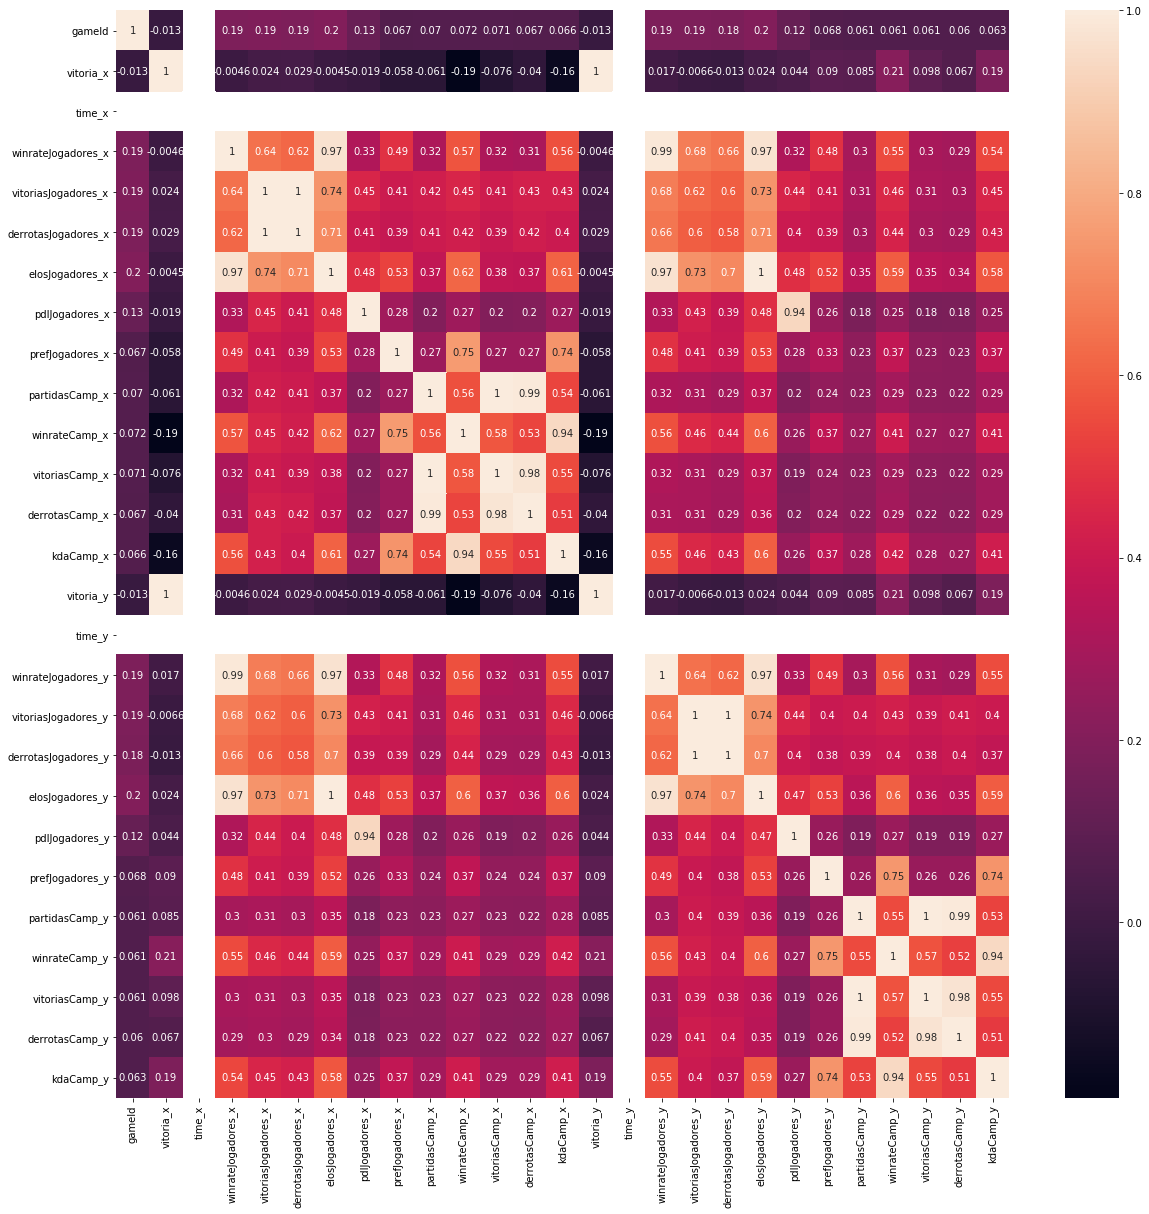

In [121]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(prePartidaPorTime2[prePartidaPorTime2.columns].corr(), annot=True)

In [124]:
#Testando partida com os dados somados dos jogadores
x = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2829
           1       0.74      0.73      0.74      2706

   micro avg       0.75      0.75      0.75      5535
   macro avg       0.75      0.75      0.75      5535
weighted avg       0.75      0.75      0.75      5535



In [154]:
#Testando partida com os dados somados dos jogadores
x = prePartidaPorTime2[['winrateCamp_x', 
                        'winrateCamp_y']]
y = prePartidaPorTime2['vitoria_x']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      2839
           1       0.68      0.65      0.66      2696

   micro avg       0.68      0.68      0.68      5535
   macro avg       0.68      0.68      0.68      5535
weighted avg       0.68      0.68      0.68      5535



In [140]:
#Testando partida com os dados somados dos jogadores
x = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.56      0.63      0.60      2843
           1       0.55      0.48      0.51      2692

   micro avg       0.56      0.56      0.56      5535
   macro avg       0.56      0.56      0.55      5535
weighted avg       0.56      0.56      0.55      5535



In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

#Testando partida com os dados somados dos jogadores com MLP
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      2847
           1       0.71      0.54      0.62      2688

   micro avg       0.67      0.67      0.67      5535
   macro avg       0.68      0.67      0.66      5535
weighted avg       0.68      0.67      0.67      5535



In [156]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.71      0.03      0.06      2847
           1       0.49      0.99      0.65      2688

   micro avg       0.50      0.50      0.50      5535
   macro avg       0.60      0.51      0.36      5535
weighted avg       0.60      0.50      0.35      5535



In [157]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateCamp_x', 'prefJogadores_x', 'winrateCamp_y', 'prefJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66      2847
           1       0.64      0.71      0.68      2688

   micro avg       0.67      0.67      0.67      5535
   macro avg       0.67      0.67      0.67      5535
weighted avg       0.67      0.67      0.67      5535



In [95]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y', 'elosJogadores_x', 'elosJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59      2847
           1       0.60      0.78      0.68      2688

   micro avg       0.64      0.64      0.64      5535
   macro avg       0.66      0.65      0.64      5535
weighted avg       0.66      0.64      0.63      5535



In [115]:
#Mesmo teste acima mas com Naive Bayes
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
total = X.shape[0]
erros = (y != y_pred).sum()
print("Precisão: ", erros/total)

Precisão:  0.3872075164874876


In [112]:
#Mesmo teste acima mas com KNN
import numpy
from sklearn.neighbors import KNeighborsClassifier

X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

knn = KNeighborsClassifier(n_neighbors = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
yt = y_test
xt = X_test
knn.fit(xt,yt)

#validacão com o restante dos dados
xv = X_train
yv = y_train
yp = knn.predict(xv)

knn.score(xv, yv)

0.5318033971810625

In [114]:
#KNN com todos os dados
import numpy
from sklearn.neighbors import KNeighborsClassifier

X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

knn = KNeighborsClassifier(n_neighbors = 6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
yt = y_test
xt = X_test
knn.fit(xt,yt)

#validacão com o restante dos dados
xv = X_train
yv = y_train
yp = knn.predict(xv)

knn.score(xv, yv)

0.5782435851102277

In [245]:
bd = sqlite3.connect(bdPath)
prePartidaTotal = pd.read_sql('''
SELECT DISTINCT partida.gameid, 
       partida.vitoria, 
       jogador_partida.time, 
       jogador_partida.summonerid, 
       jogador.winrate, 
       jogador.vitorias, 
       jogador.derrotas, 
       campeao.campeaoid, 
       elo.elonum, 
       jogador.pdl, 
       campeao_jogador.campeaopref, 
       campeao_jogador.partidas AS partidasCamp, 
       campeao_jogador.winrate  AS winrateCamp, 
       campeao_jogador.vitorias AS vitoriasCamp, 
       campeao_jogador.derrotas AS derrotasCamp, 
       campeao_jogador.kda      AS kdaCamp 
FROM   partida 
       INNER JOIN jogador_partida 
               ON jogador_partida.gameid = partida.gameid 
       INNER JOIN jogador 
               ON jogador.summonerid = jogador_partida.summonerid 
       INNER JOIN campeao 
               ON campeao.nome = jogador_partida.campeaonome 
       INNER JOIN elo 
               ON elo.elo = jogador.elo 
       LEFT JOIN campeao_jogador 
               ON campeao_jogador.summonerid = jogador_partida.summonerid 
                  AND campeao_jogador.campeaonome = jogador_partida.campeaonome
                            ''', bd)
bd.close()

In [246]:
prePartidaTotal = prePartidaTotal.sort_values(['gameId', 'time'])
prePartidaTotal.fillna(0, inplace=True)
prePartidaTotal.head(10)

gameId  vitoria  time  summonerId  winrate  vitorias  derrotas  \
8702    1543573986        1     0      479504     52.0       186       170   
9457    1543573986        1     0      442011     57.0        74        55   
44241   1543573986        1     0     1402833     49.0       885       922   
57760   1543573986        1     0     5655450     55.0       215       173   
79080   1543573986        1     0      521296     54.0        54        46   
0       1543573986        1     1    11500133     50.0       189       186   
7375    1543573986        1     1     1623096     51.0       654       640   
24132   1543573986        1     1    34350392     72.0        73        29   
88921   1543573986        1     1     8940999     50.0      1017      1023   
102504  1543573986        1     1    23812390     55.0       516       419   

        campeaoId  eloNum  pdl  campeaoPref  partidasCamp  winrateCamp  \
8702          101      17   17          0.0           0.0          0.0   
9457          498      17   21          0.0           0.0          0.0   
44241         267      15   69          0.0           0.0          0.0   
57760          64      18    0          1.0          39.0         69.0   
79080          39      17    0          0.0           0.0          0.0   
0             143      18   56          1.0          26.0         69.0   
7375            5      17   91          0.0           0.0          0.0   
24132          91      17   75          1.0          84.0         76.0   
88921          81      17   54          3.0          41.0         49.0   
102504         63      19   94          0.0           0.0          0.0   

        vitoriasCamp  derrotasCamp  kdaCamp  
8702             0.0           0.0     0.00  
9457             0.0           0.0     0.00  
44241            0.0           0.0     0.00  
57760           27.0          12.0     3.22  
79080            0.0           0.0     0.00  
0               18.0           8.0     3.34  
7375             0.0           0.0     0.00  
24132           64.0          20.0     3.48  
88921           20.0          21.0     2.31  
102504           0.0           0.0     0.00

In [247]:
prePartidaTotal2 = prePartidaTotal
prePartidaTotal2.head(10)

gameId  vitoria  time  summonerId  winrate  vitorias  derrotas  \
8702    1543573986        1     0      479504     52.0       186       170   
9457    1543573986        1     0      442011     57.0        74        55   
44241   1543573986        1     0     1402833     49.0       885       922   
57760   1543573986        1     0     5655450     55.0       215       173   
79080   1543573986        1     0      521296     54.0        54        46   
0       1543573986        1     1    11500133     50.0       189       186   
7375    1543573986        1     1     1623096     51.0       654       640   
24132   1543573986        1     1    34350392     72.0        73        29   
88921   1543573986        1     1     8940999     50.0      1017      1023   
102504  1543573986        1     1    23812390     55.0       516       419   

        campeaoId  eloNum  pdl  campeaoPref  partidasCamp  winrateCamp  \
8702          101      17   17          0.0           0.0          0.0   
9457          498      17   21          0.0           0.0          0.0   
44241         267      15   69          0.0           0.0          0.0   
57760          64      18    0          1.0          39.0         69.0   
79080          39      17    0          0.0           0.0          0.0   
0             143      18   56          1.0          26.0         69.0   
7375            5      17   91          0.0           0.0          0.0   
24132          91      17   75          1.0          84.0         76.0   
88921          81      17   54          3.0          41.0         49.0   
102504         63      19   94          0.0           0.0          0.0   

        vitoriasCamp  derrotasCamp  kdaCamp  
8702             0.0           0.0     0.00  
9457             0.0           0.0     0.00  
44241            0.0           0.0     0.00  
57760           27.0          12.0     3.22  
79080            0.0           0.0     0.00  
0               18.0           8.0     3.34  
7375             0.0           0.0     0.00  
24132           64.0          20.0     3.48  
88921           20.0          21.0     2.31  
102504           0.0           0.0     0.00

In [248]:
partidasDadosSeparados = pd.DataFrame()
partidasDadosSeparados["gameId"] = ''
partidasDadosSeparados["vitoria"] = ''
partidasDadosSeparados["summonerId_0"] = ''
partidasDadosSeparados["summonerId_1"] = ''
partidasDadosSeparados["summonerId_2"] = ''
partidasDadosSeparados["summonerId_3"] = ''
partidasDadosSeparados["summonerId_4"] = ''
partidasDadosSeparados["summonerId_5"] = ''
partidasDadosSeparados["summonerId_6"] = ''
partidasDadosSeparados["summonerId_7"] = ''
partidasDadosSeparados["summonerId_8"] = ''
partidasDadosSeparados["summonerId_9"] = ''
partidasDadosSeparados["winrate_0"] = ''
partidasDadosSeparados["winrate_1"] = ''
partidasDadosSeparados["winrate_2"] = ''
partidasDadosSeparados["winrate_3"] = ''
partidasDadosSeparados["winrate_4"] = ''
partidasDadosSeparados["winrate_5"] = ''
partidasDadosSeparados["winrate_6"] = ''
partidasDadosSeparados["winrate_7"] = ''
partidasDadosSeparados["winrate_8"] = ''
partidasDadosSeparados["winrate_9"] = ''
partidasDadosSeparados["campeaoId_0"] = ''
partidasDadosSeparados["campeaoId_1"] = ''
partidasDadosSeparados["campeaoId_2"] = ''
partidasDadosSeparados["campeaoId_3"] = ''
partidasDadosSeparados["campeaoId_4"] = ''
partidasDadosSeparados["campeaoId_5"] = ''
partidasDadosSeparados["campeaoId_6"] = ''
partidasDadosSeparados["campeaoId_7"] = ''
partidasDadosSeparados["campeaoId_8"] = ''
partidasDadosSeparados["campeaoId_9"] = ''
partidasDadosSeparados["eloNum_0"] = ''
partidasDadosSeparados["eloNum_1"] = ''
partidasDadosSeparados["eloNum_2"] = ''
partidasDadosSeparados["eloNum_3"] = ''
partidasDadosSeparados["eloNum_4"] = ''
partidasDadosSeparados["eloNum_5"] = ''
partidasDadosSeparados["eloNum_6"] = ''
partidasDadosSeparados["eloNum_7"] = ''
partidasDadosSeparados["eloNum_8"] = ''
partidasDadosSeparados["eloNum_9"] = ''
partidasDadosSeparados["winrateCamp_0"] = ''
partidasDadosSeparados["winrateCamp_1"] = ''
partidasDadosSeparados["winrateCamp_2"] = ''
partidasDadosSeparados["winrateCamp_3"] = ''
partidasDadosSeparados["winrateCamp_4"] = ''
partidasDadosSeparados["winrateCamp_5"] = ''
partidasDadosSeparados["winrateCamp_6"] = ''
partidasDadosSeparados["winrateCamp_7"] = ''
partidasDadosSeparados["winrateCamp_8"] = ''
partidasDadosSeparados["winrateCamp_9"] = ''
partidasDadosSeparados["kdaCamp_0"] = ''
partidasDadosSeparados["kdaCamp_1"] = ''
partidasDadosSeparados["kdaCamp_2"] = ''
partidasDadosSeparados["kdaCamp_3"] = ''
partidasDadosSeparados["kdaCamp_4"] = ''
partidasDadosSeparados["kdaCamp_5"] = ''
partidasDadosSeparados["kdaCamp_6"] = ''
partidasDadosSeparados["kdaCamp_7"] = ''
partidasDadosSeparados["kdaCamp_8"] = ''
partidasDadosSeparados["kdaCamp_9"] = ''
partidasDadosSeparados

Empty DataFrame
Columns: [gameId, vitoria, summonerId_0, summonerId_1, summonerId_2, summonerId_3, summonerId_4, summonerId_5, summonerId_6, summonerId_7, summonerId_8, summonerId_9, winrate_0, winrate_1, winrate_2, winrate_3, winrate_4, winrate_5, winrate_6, winrate_7, winrate_8, winrate_9, campeaoId_0, campeaoId_1, campeaoId_2, campeaoId_3, campeaoId_4, campeaoId_5, campeaoId_6, campeaoId_7, campeaoId_8, campeaoId_9, eloNum_0, eloNum_1, eloNum_2, eloNum_3, eloNum_4, eloNum_5, eloNum_6, eloNum_7, eloNum_8, eloNum_9, winrateCamp_0, winrateCamp_1, winrateCamp_2, winrateCamp_3, winrateCamp_4, winrateCamp_5, winrateCamp_6, winrateCamp_7, winrateCamp_8, winrateCamp_9, kdaCamp_0, kdaCamp_1, kdaCamp_2, kdaCamp_3, kdaCamp_4, kdaCamp_5, kdaCamp_6, kdaCamp_7, kdaCamp_8, kdaCamp_9]
Index: []

[0 rows x 62 columns]

In [252]:
while prePartidaTotal2.shape[0] > 0:
    times = prePartidaTotal2.head(10)

    time0 = times[times.time != 1]
    time1 = times[times.time != 0]

    gameId = time0.iloc[0]['gameId']
    print(gameId)
    partidasDadosSeparados = partidasDadosSeparados.append(pd.Series([gameId, time0.iloc[0]['vitoria'],
                                                                     time0.iloc[0]['summonerId'],
                                                                     time0.iloc[1]['summonerId'],
                                                                     time0.iloc[2]['summonerId'],
                                                                     time0.iloc[3]['summonerId'],
                                                                     time0.iloc[4]['summonerId'],
                                                                     time1.iloc[0]['summonerId'],
                                                                     time1.iloc[1]['summonerId'],
                                                                     time1.iloc[2]['summonerId'],
                                                                     time1.iloc[3]['summonerId'],
                                                                     time1.iloc[4]['summonerId'],
                                                                     time0.iloc[0]['winrate'],
                                                                     time0.iloc[1]['winrate'],
                                                                     time0.iloc[2]['winrate'],
                                                                     time0.iloc[3]['winrate'],
                                                                     time0.iloc[4]['winrate'],
                                                                     time1.iloc[0]['winrate'],
                                                                     time1.iloc[1]['winrate'],
                                                                     time1.iloc[2]['winrate'],
                                                                     time1.iloc[3]['winrate'],
                                                                     time1.iloc[4]['winrate'],
                                                                     time0.iloc[0]['campeaoId'],
                                                                     time0.iloc[1]['campeaoId'],
                                                                     time0.iloc[2]['campeaoId'],
                                                                     time0.iloc[3]['campeaoId'],
                                                                     time0.iloc[4]['campeaoId'],
                                                                     time1.iloc[0]['campeaoId'],
                                                                     time1.iloc[1]['campeaoId'],
                                                                     time1.iloc[2]['campeaoId'],
                                                                     time1.iloc[3]['campeaoId'],
                                                                     time1.iloc[4]['campeaoId'],
                                                                     time0.iloc[0]['eloNum'],
                                                                     time0.iloc[1]['eloNum'],
                                                                     time0.iloc[2]['eloNum'],
                                                                     time0.iloc[3]['eloNum'],
                                                                     time0.iloc[4]['eloNum'],
                                                                     time1.iloc[0]['eloNum'],
                                                                     time1.iloc[1]['eloNum'],
                                                                     time1.iloc[2]['eloNum'],
                                                                     time1.iloc[3]['eloNum'],
                                                                     time1.iloc[4]['eloNum'],
                                                                     time0.iloc[0]['winrateCamp'],
                                                                     time0.iloc[1]['winrateCamp'],
                                                                     time0.iloc[2]['winrateCamp'],
                                                                     time0.iloc[3]['winrateCamp'],
                                                                     time0.iloc[4]['winrateCamp'],
                                                                     time1.iloc[0]['winrateCamp'],
                                                                     time1.iloc[1]['winrateCamp'],
                                                                     time1.iloc[2]['winrateCamp'],
                                                                     time1.iloc[3]['winrateCamp'],
                                                                     time1.iloc[4]['winrateCamp'],
                                                                     time0.iloc[0]['kdaCamp'],
                                                                     time0.iloc[1]['kdaCamp'],
                                                                     time0.iloc[2]['kdaCamp'],
                                                                     time0.iloc[3]['kdaCamp'],
                                                                     time0.iloc[4]['kdaCamp'],
                                                                     time1.iloc[0]['kdaCamp'],
                                                                     time1.iloc[1]['kdaCamp'],
                                                                     time1.iloc[2]['kdaCamp'],
                                                                     time1.iloc[3]['kdaCamp'],
                                                                     time1.iloc[4]['kdaCamp'],
                                                                     ], index=partidasDadosSeparados.columns ), ignore_index=True)

    prePartidaTotal2 = prePartidaTotal2[prePartidaTotal2.gameId != gameId]

In [253]:
partidasDadosSeparados.shape

(11069, 62)

In [254]:
partidasDadosSeparados.head(10)

gameId  vitoria  summonerId_0  summonerId_1  summonerId_2  \
0  1.543574e+09      1.0      479504.0      442011.0     1402833.0   
1  1.543611e+09      0.0      479335.0     4488841.0      634021.0   
2  1.543624e+09      0.0      484985.0      653080.0      485854.0   
3  1.543626e+09      0.0      479335.0     9040311.0    16421531.0   
4  1.543651e+09      0.0     2363027.0    18724441.0     1872942.0   
5  1.543709e+09      1.0     3866139.0    16573464.0    13125320.0   
6  1.543724e+09      0.0     1909957.0      451496.0    28432805.0   
7  1.543762e+09      0.0      529956.0      674799.0     1060811.0   
8  1.543775e+09      1.0     6373497.0     2541217.0    30963302.0   
9  1.543824e+09      1.0      530400.0     3527180.0    16170471.0   

   summonerId_3  summonerId_4  summonerId_5  summonerId_6  summonerId_7  \
0     5655450.0      521296.0    11500133.0     1623096.0    34350392.0   
1     3092661.0     1413276.0      498105.0    17141933.0     3243533.0   
2     1121452.0    17633807.0     2349890.0     7742217.0    31122626.0   
3     1494920.0     3661358.0     1431901.0    35177685.0    16415376.0   
4    22195659.0    14153582.0    35177685.0      543625.0     3768538.0   
5     2498559.0     3560178.0     6632838.0     5723026.0     9323509.0   
6    15091861.0     4162539.0    15932667.0    14220873.0    31174008.0   
7     1402833.0     1091186.0     4209256.0    18465510.0    13297262.0   
8      584791.0     1184594.0     5783262.0    29080274.0      993236.0   
9      669246.0     7744572.0     1512713.0     4340490.0     4794943.0   

     ...      kdaCamp_0  kdaCamp_1  kdaCamp_2  kdaCamp_3  kdaCamp_4  \
0    ...           0.00       0.00       0.00       3.22       0.00   
1    ...           3.84       1.97       3.02       1.94       2.35   
2    ...           0.00       2.72       3.02       1.74       0.00   
3    ...           3.84       1.84       3.69       2.69       0.00   
4    ...           0.92       2.26       0.00       1.66       2.30   
5    ...           2.24       0.00       4.66       0.00       0.00   
6    ...           3.11       0.00       0.00       2.15       0.00   
7    ...           4.38       0.00       0.00       0.00       0.00   
8    ...           2.64       2.43       0.00       0.00       2.50   
9    ...           1.12       0.00       1.78       0.00       0.00   

   kdaCamp_5  kdaCamp_6  kdaCamp_7  kdaCamp_8  kdaCamp_9  
0       3.34       0.00       3.48       2.31       0.00  
1       2.31       2.23       3.82       0.00       0.00  
2       0.00       0.00       4.13       1.81       0.00  
3       0.00       1.11       2.89       1.87       1.72  
4       1.87       0.00       0.00       2.43       0.00  
5       3.71       2.81       2.65       1.82       0.00  
6       0.00       2.19       2.52       2.42       0.00  
7       0.00       0.00       1.13       2.12       2.22  
8       1.75       2.19       0.00       2.04       2.60  
9       0.00       0.00       2.88       3.20       0.00  

[10 rows x 62 columns]

In [261]:
x = partidasDadosSeparados[partidasDadosSeparados.columns]
x = x.drop(['gameId', 'vitoria'], axis=1)
y = partidasDadosSeparados['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

         0.0       0.51      0.66      0.57      2828
         1.0       0.48      0.32      0.39      2707

   micro avg       0.50      0.50      0.50      5535
   macro avg       0.49      0.49      0.48      5535
weighted avg       0.49      0.50      0.48      5535



In [262]:
partidasDadosSeparados.columns

Index(['gameId', 'vitoria', 'summonerId_0', 'summonerId_1', 'summonerId_2',
       'summonerId_3', 'summonerId_4', 'summonerId_5', 'summonerId_6',
       'summonerId_7', 'summonerId_8', 'summonerId_9', 'winrate_0',
       'winrate_1', 'winrate_2', 'winrate_3', 'winrate_4', 'winrate_5',
       'winrate_6', 'winrate_7', 'winrate_8', 'winrate_9', 'campeaoId_0',
       'campeaoId_1', 'campeaoId_2', 'campeaoId_3', 'campeaoId_4',
       'campeaoId_5', 'campeaoId_6', 'campeaoId_7', 'campeaoId_8',
       'campeaoId_9', 'eloNum_0', 'eloNum_1', 'eloNum_2', 'eloNum_3',
       'eloNum_4', 'eloNum_5', 'eloNum_6', 'eloNum_7', 'eloNum_8', 'eloNum_9',
       'winrateCamp_0', 'winrateCamp_1', 'winrateCamp_2', 'winrateCamp_3',
       'winrateCamp_4', 'winrateCamp_5', 'winrateCamp_6', 'winrateCamp_7',
       'winrateCamp_8', 'winrateCamp_9', 'kdaCamp_0', 'kdaCamp_1', 'kdaCamp_2',
       'kdaCamp_3', 'kdaCamp_4', 'kdaCamp_5', 'kdaCamp_6', 'kdaCamp_7',
       'kdaCamp_8', 'kdaCamp_9'],
      dtype='object'

In [264]:
x = partidasDadosSeparados[['winrate_1', 'winrate_2', 'winrate_3', 'winrate_4', 'winrate_5',
       'winrate_6', 'winrate_7', 'winrate_8', 'winrate_9', 'campeaoId_0',
       'campeaoId_1', 'campeaoId_2', 'campeaoId_3', 'campeaoId_4',
       'campeaoId_5', 'campeaoId_6', 'campeaoId_7', 'campeaoId_8',
       'campeaoId_9', 'eloNum_0', 'eloNum_1', 'eloNum_2', 'eloNum_3',
       'eloNum_4', 'eloNum_5', 'eloNum_6', 'eloNum_7', 'eloNum_8', 'eloNum_9',
       'winrateCamp_0', 'winrateCamp_1', 'winrateCamp_2', 'winrateCamp_3',
       'winrateCamp_4', 'winrateCamp_5', 'winrateCamp_6', 'winrateCamp_7',
       'winrateCamp_8', 'winrateCamp_9']]
y = partidasDadosSeparados['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.73      2850
         1.0       0.71      0.71      0.71      2685

   micro avg       0.72      0.72      0.72      5535
   macro avg       0.72      0.72      0.72      5535
weighted avg       0.72      0.72      0.72      5535



In [271]:
x = partidasDadosSeparados[['winrate_0',
       'winrate_1', 'winrate_2', 'winrate_3', 'winrate_4', 'winrate_5',
       'winrate_6', 'winrate_7', 'winrate_8', 'winrate_9','eloNum_0', 'eloNum_1', 'eloNum_2', 'eloNum_3',
       'eloNum_4', 'eloNum_5', 'eloNum_6', 'eloNum_7', 'eloNum_8', 'eloNum_9',
       'winrateCamp_0', 'winrateCamp_1', 'winrateCamp_2', 'winrateCamp_3',
       'winrateCamp_4', 'winrateCamp_5', 'winrateCamp_6', 'winrateCamp_7',
       'winrateCamp_8', 'winrateCamp_9', 'kdaCamp_0', 'kdaCamp_1', 'kdaCamp_2',]]
y = partidasDadosSeparados['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72      2816
         1.0       0.71      0.70      0.71      2719

   micro avg       0.72      0.72      0.72      5535
   macro avg       0.72      0.71      0.71      5535
weighted avg       0.72      0.72      0.72      5535

